In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_set = pd.read_csv("Training Set.csv")
training_label = pd.read_csv("Training Set Labels.csv")
all_data = pd.merge(training_set, training_label, how="left", on="id")
print(all_data.shape)
all_data.head()

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


# Cleansing

## Drop columns

In [3]:
feature_list = ['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'basin',
 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'scheme_management',
 'permit', 'construction_year', 'extraction_type_group', 'extraction_type_class', 'management', 'payment_type', 'water_quality',
 'quantity', 'source_type', 'source_class', 'waterpoint_type', 'status_group']

all_data = all_data[feature_list]
print(all_data.shape)
all_data.head()

(59400, 29)


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,subvillage,region,...,extraction_type_group,extraction_type_class,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,status_group
0,6000.0,3/14/11,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,...,gravity,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,0.0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,...,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,...,gravity,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,0.0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,...,submersible,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
4,0.0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,...,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [9]:
clean_data.groupby("status_group").size()

status_group
functional                 31389
functional needs repair     3931
non functional             22268
dtype: int64

## Check each column

### "longitude"

In [5]:
print(all_data["longitude"].describe())
print("Number of empty cells: ", all_data["longitude"].isnull().sum())

count    59400.000000
mean        34.077427
std          6.567432
min          0.000000
25%         33.090347
50%         34.908743
75%         37.178387
max         40.345193
Name: longitude, dtype: float64
Number of empty cells:  0


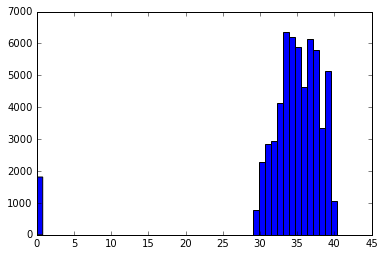

In [6]:
plt.hist(all_data["longitude"], 50)
plt.show()

In [7]:
a = all_data[all_data["longitude"] == 0]
a.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,1812.0,1812.0,1812.0,1.812000e+03,1812.000000,1812.000000,1812.0,1812.0
mean,0.0,0.0,0.0,-2.000000e-08,17.820088,2.497241,0.0,0.0
std,0.0,0.0,0.0,3.541310e-22,1.023562,2.157389,0.0,0.0
min,0.0,0.0,0.0,-2.000000e-08,11.000000,1.000000,0.0,0.0
25%,0.0,0.0,0.0,-2.000000e-08,17.000000,1.000000,0.0,0.0
50%,0.0,0.0,0.0,-2.000000e-08,17.000000,1.000000,0.0,0.0
75%,0.0,0.0,0.0,-2.000000e-08,19.000000,6.000000,0.0,0.0
max,0.0,0.0,0.0,-2.000000e-08,19.000000,6.000000,0.0,0.0


## **We remove those with longitude = 0. Since construction year and population are all 0s as well**

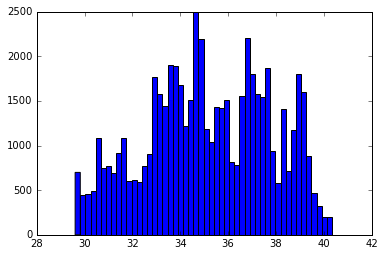

In [8]:
clean_data = all_data[all_data["longitude"] > 0]
plt.hist(clean_data["longitude"], 50)
plt.show()

### "amount_tsh" - total static head (amount water available to waterpoint)

In [9]:
clean_data["amount_tsh"].describe()

count     57588.000000
mean        327.645219
std        3043.831403
min           0.000000
25%           0.000000
50%           0.000000
75%          30.000000
max      350000.000000
Name: amount_tsh, dtype: float64

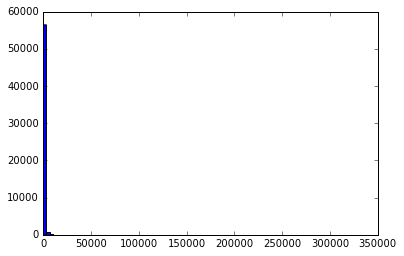

(18, 29)


In [9]:
plt.hist(clean_data["amount_tsh"], 100)
plt.show()
print(all_data[all_data["amount_tsh"] > 50000].shape)

In [19]:
sub = clean_data[clean_data['gps_height'] == 0]
sub['amount_tsh'].describe()

count    18626.000000
mean        10.593794
std        112.886801
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3000.000000
Name: amount_tsh, dtype: float64

There is obivous outliers, we should remove those.

### "date_recorded" - the date the row was entered

In [19]:
print(clean_data["date_recorded"].describe())
print("Number of empty cells: ", clean_data["date_recorded"].isnull().sum())

count       57588
unique        353
top       3/15/11
freq          572
Name: date_recorded, dtype: object
Number of empty cells:  0


In [12]:
date_recorded = pd.to_datetime(clean_data["date_recorded"])
print(date_recorded.min())
print(date_recorded.max())

2002-10-14 00:00:00
2013-12-03 00:00:00


## We will not use date recorded as it is, we will use date recorded - earlier date instead and treat them as continuous random variables.

### "funder" - who funded the well

In [20]:
print(clean_data["funder"].describe())
print("Number of empty cells: ", clean_data["funder"].isnull().sum())

count                      53966
unique                      1858
top       Government Of Tanzania
freq                        8842
Name: funder, dtype: object
Number of empty cells:  3622


In [37]:
clean_data.groupby("funder").size().sort_values(ascending=False)

funder
Government Of Tanzania          8842
Danida                          3114
Hesawa                          1914
World Bank                      1345
Kkkt                            1287
World Vision                    1224
Rwssp                           1187
Unicef                          1035
District Council                 843
Tasaf                            834
Dhv                              829
Private Individual               824
0                                777
Norad                            765
Germany Republi                  610
Tcrs                             602
Ministry Of Water                590
Water                            583
Dwe                              484
Netherlands                      461
Hifab                            450
Adb                              448
Lga                              442
Amref                            425
Fini Water                       393
Oxfam                            359
Dwsp                           

### "gps_height" - altitude of the well

In [21]:
print(clean_data["gps_height"].describe())
print("Number of empty cells: ", clean_data["gps_height"].isnull().sum())

count    57588.000000
mean       689.325137
std        693.564188
min        -90.000000
25%          0.000000
50%        426.000000
75%       1332.000000
max       2770.000000
Name: gps_height, dtype: float64
Number of empty cells:  0


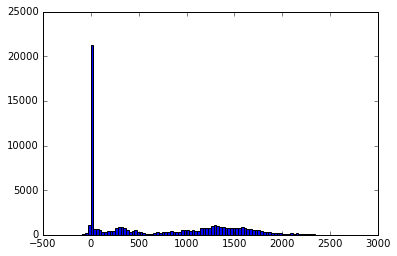

In [30]:
plt.hist(all_data["gps_height"], 100)
plt.show()

Tanzania's elevation extremes: 0m - 5895m (according to Wikipedia), **does that mean those with gps_height < 0 are wrong?**

In [13]:
clean_data[clean_data["gps_height"] == 0].groupby("status_group").size()

status_group
functional                 9599
functional needs repair    1377
non functional             7650
dtype: int64

### "installer" - organization that installed the well

In [9]:
print(clean_data["installer"].describe())
print("Number of empty cells: ", clean_data["installer"].isnull().sum())

count     53952
unique     2113
top         DWE
freq      16255
Name: installer, dtype: object
Number of empty cells:  3636


In [10]:
clean_data.groupby("installer").size().sort_values(ascending=False)

installer
DWE                      16255
Government                1670
RWE                       1181
Commu                     1060
DANIDA                    1050
KKKT                       897
Hesawa                     803
0                          777
TCRS                       707
Central government         619
CES                        610
DANID                      552
District Council           551
Community                  539
HESAWA                     537
LGA                        408
World vision               408
WEDECO                     397
District council           392
Gover                      383
TASAF                      377
AMREF                      329
TWESA                      316
WU                         301
Dmdd                       287
ACRA                       278
SEMA                       249
World Vision               248
DW                         246
OXFAM                      234
                         ...  
NGINIL                       

### "latitude"

In [38]:
print(all_data["latitude"].describe())
print("Number of empty cells: ", all_data["latitude"].isnull().sum())

count    5.940000e+04
mean    -5.706033e+00
std      2.946019e+00
min     -1.164944e+01
25%     -8.540621e+00
50%     -5.021597e+00
75%     -3.326156e+00
max     -2.000000e-08
Name: latitude, dtype: float64
Number of empty cells:  0


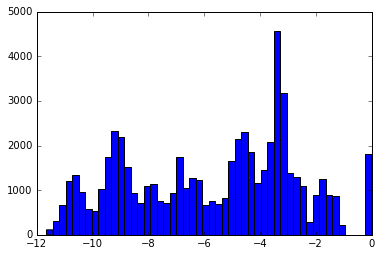

In [39]:
plt.hist(all_data["latitude"], 50)
plt.show()

### "basin" - geographic water basin

In [40]:
print(all_data["basin"].describe())
print("Number of empty cells: ", all_data["basin"].isnull().sum())

count             59400
unique                9
top       Lake Victoria
freq              10248
Name: basin, dtype: object
Number of empty cells:  0


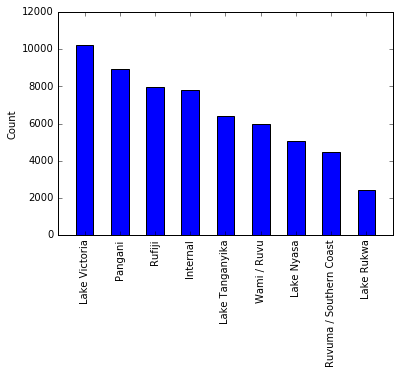

In [46]:
group = all_data.groupby(["basin"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### "subvillage" - geographic location

In [47]:
print(all_data["subvillage"].describe())
print("Number of empty cells: ", all_data["subvillage"].isnull().sum())

count        59029
unique       19287
top       Madukani
freq           508
Name: subvillage, dtype: object
Number of empty cells:  371


### "region" - geographic location

In [48]:
print(all_data["region"].describe())
print("Number of empty cells: ", all_data["region"].isnull().sum())

count      59400
unique        21
top       Iringa
freq        5294
Name: region, dtype: object
Number of empty cells:  0


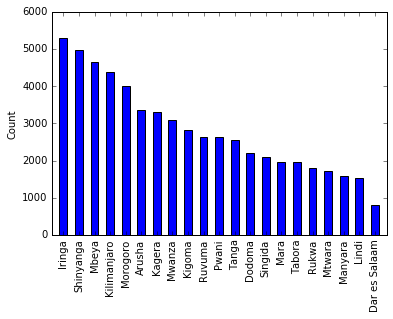

In [49]:
group = all_data.groupby(["region"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### "region_code" - geographic location (coded)

In [50]:
print(all_data["region_code"].describe())
print("Number of empty cells: ", all_data["region_code"].isnull().sum())

count    59400.000000
mean        15.297003
std         17.587406
min          1.000000
25%          5.000000
50%         12.000000
75%         17.000000
max         99.000000
Name: region_code, dtype: float64
Number of empty cells:  0


We should treat region code as object.

### "lga" - geographic location

In [52]:
print(all_data["lga"].describe())
print("Number of empty cells: ", all_data["lga"].isnull().sum())

count      59400
unique       125
top       Njombe
freq        2503
Name: lga, dtype: object
Number of empty cells:  0


### "ward" - geographic location

In [27]:
print(clean_data["ward"].describe())
print("Number of empty cells: ", clean_data["ward"].isnull().sum())

count     57588
unique     2033
top       Igosi
freq        307
Name: ward, dtype: object
Number of empty cells:  0


### "population" - population around the well

In [11]:
print(all_data["population"].describe())
print("Number of empty cells: ", all_data["population"].isnull().sum())

count    59400.000000
mean       179.909983
std        471.482176
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64
Number of empty cells:  0


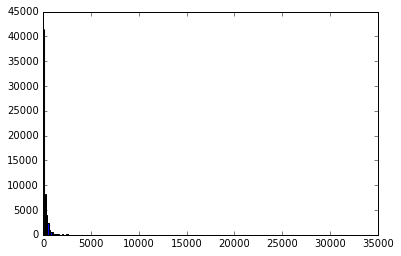

In [12]:
plt.hist(all_data["population"], 200)
plt.show()

In [24]:
clean_data[clean_data["population"] == 0].groupby("status_group").size()

status_group
functional                 10404
functional needs repair     1389
non functional              7776
dtype: int64

We should remove the obvious outliers. And why so many 0 population?!

### "public_meeting" - True/False

In [29]:
print(clean_data["public_meeting"].describe())
print("Number of empty cells: ", clean_data["public_meeting"].isnull().sum())

count     54612
unique        2
top        True
freq      49737
Name: public_meeting, dtype: object
Number of empty cells:  2976


In [20]:
clean_data[clean_data['public_meeting'] == False].groupby('status_group').size()

status_group
functional                 2153
functional needs repair     355
non functional             2367
dtype: int64

### "scheme_management" - who operates the waterpoint

In [30]:
print(clean_data["scheme_management"].describe())
print("Number of empty cells: ", clean_data["scheme_management"].isnull().sum())

count     53838
unique       12
top         VWC
freq      36143
Name: scheme_management, dtype: object
Number of empty cells:  3750


In [11]:
clean_data.groupby("scheme_management").size().sort_values(ascending=False)

scheme_management
VWC                 36143
WUG                  4249
Water authority      3151
WUA                  2882
Water Board          2747
Parastatal           1607
Private operator     1063
Company              1061
Other                 765
SWC                    97
Trust                  72
None                    1
dtype: int64

In [18]:
b = clean_data[clean_data["scheme_management"] == "Water Board"]
b.groupby('status_group').size()

status_group
functional                 2053
functional needs repair     110
non functional              584
dtype: int64

In [33]:
# Check if the missing values overlap
b = clean_data[clean_data["scheme_management"].isnull()]
print("Number of empty cells: ", b["permit"].isnull().sum())
print("Number of empty cells: ", b["public_meeting"].isnull().sum())

# Nope...

Number of empty cells:  41
Number of empty cells:  405


### "permit" - if the waterpoint is permitted

In [28]:
print(clean_data["permit"].describe())
print("Number of empty cells: ", clean_data["permit"].isnull().sum())

count     54532
unique        2
top        True
freq      38100
Name: permit, dtype: object
Number of empty cells:  3056


In [23]:
clean_data[clean_data['public_meeting'] == False].groupby('status_group').size()

status_group
functional                 2153
functional needs repair     355
non functional             2367
dtype: int64

### "construction_year" - year the waterpoint was constructed

In [23]:
print(clean_data["construction_year"].describe())
print("Number of empty cells: ", clean_data["construction_year"].isnull().sum())

count    57588.000000
mean      1341.577360
std        937.641368
min          0.000000
25%          0.000000
50%       1988.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64
Number of empty cells:  0


In [16]:
# Check how many different yea
clean_data[clean_data["construction_year"] != 0].describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000,38691.000000
mean,466.457534,1002.367760,35.983262,-6.235372,15.706495,5.969786,269.799617,1996.814686
std,3541.036030,618.078669,2.558709,2.761317,21.003006,10.700673,552.343746,12.472045
min,0.000000,-63.000000,29.607122,-11.649440,2.000000,1.000000,0.000000,1960.000000
25%,0.000000,372.000000,34.676719,-8.755274,4.000000,2.000000,30.000000,1987.000000
50%,0.000000,1154.000000,36.648187,-6.064216,11.000000,3.000000,150.000000,2000.000000
75%,200.000000,1488.000000,37.803940,-3.650661,16.000000,5.000000,305.000000,2008.000000
max,350000.000000,2770.000000,40.345193,-1.042375,99.000000,63.000000,30500.000000,2013.000000


We should treat this as categorical data

### "extraction_type_group" - the kind of extraction the waterpoint uses

In [73]:
print(all_data["extraction_type_group"].describe())
print("Number of empty cells: ", all_data["extraction_type_group"].isnull().sum())

count       59400
unique         13
top       gravity
freq        26780
Name: extraction_type_group, dtype: object
Number of empty cells:  0


### "extraction_type_class" - the kind of extraction the waterpoint uses

In [74]:
print(all_data["extraction_type_class"].describe())
print("Number of empty cells: ", all_data["extraction_type_class"].isnull().sum())

count       59400
unique          7
top       gravity
freq        26780
Name: extraction_type_class, dtype: object
Number of empty cells:  0


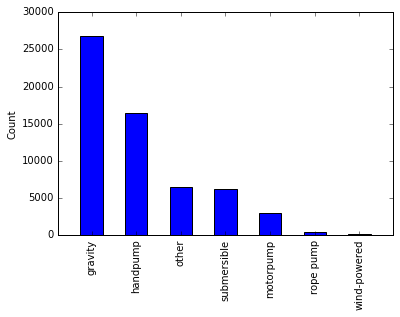

In [75]:
group = all_data.groupby(["extraction_type_class"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### "management" - how the waterpoint is managed

In [76]:
print(all_data["management"].describe())
print("Number of empty cells: ", all_data["management"].isnull().sum())

count     59400
unique       12
top         vwc
freq      40507
Name: management, dtype: object
Number of empty cells:  0


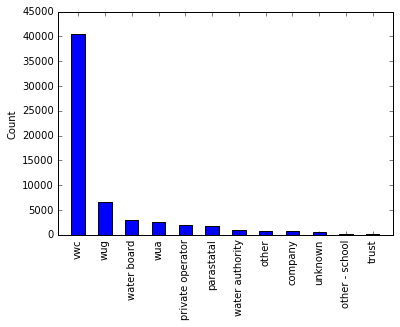

In [77]:
group = all_data.groupby(["management"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

We probably need some cleansing for this column as well, combine unknown with other maybe?

### "payment_type" - what the water costs

In [78]:
print(all_data["payment_type"].describe())
print("Number of empty cells: ", all_data["payment_type"].isnull().sum())

count         59400
unique            7
top       never pay
freq          25348
Name: payment_type, dtype: object
Number of empty cells:  0


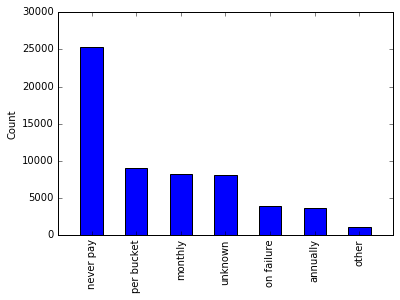

In [79]:
group = all_data.groupby(["payment_type"]).size().sort_values(ascending=False)
group_name = group.index.tolist()
ind = np.arange(len(group_name))

width = 0.5

plt.bar(ind, group, width)

plt.ylabel("Count")
plt.xticks(ind + width/2., group_name)
plt.xlim(-0.5, len(group_name))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

### "water_quality" - the quality of the water

In [80]:
print(all_data["water_quality"].describe())
print("Number of empty cells: ", all_data["water_quality"].isnull().sum())

count     59400
unique        8
top        soft
freq      50818
Name: water_quality, dtype: object
Number of empty cells:  0


### "quantity" - the quantity of the water

In [81]:
print(all_data["quantity"].describe())
print("Number of empty cells: ", all_data["quantity"].isnull().sum())

count      59400
unique         5
top       enough
freq       33186
Name: quantity, dtype: object
Number of empty cells:  0


### "source_type" - the source of the water

In [82]:
print(all_data["source_type"].describe())
print("Number of empty cells: ", all_data["source_type"].isnull().sum())

count      59400
unique         7
top       spring
freq       17021
Name: source_type, dtype: object
Number of empty cells:  0


### "source_class" - the source of the water

In [83]:
print(all_data["source_class"].describe())
print("Number of empty cells: ", all_data["source_class"].isnull().sum())

count           59400
unique              3
top       groundwater
freq            45794
Name: source_class, dtype: object
Number of empty cells:  0


### "waterpoint_type" - the kind of waterpoint

In [84]:
print(all_data["waterpoint_type"].describe())
print("Number of empty cells: ", all_data["waterpoint_type"].isnull().sum())

count                  59400
unique                     7
top       communal standpipe
freq                   28522
Name: waterpoint_type, dtype: object
Number of empty cells:  0
